# Week 14 - 29/1/18

**OBJECTIVES**

- Sort out the eps_distance_hier() function, seems to be using the wrong DM $\checkmark$
- See if we can work out why $\epsilon$ goes negative

In [1]:
%load_ext autoreload
%autoreload 2

## Sort eps_distance_hier()

We think this was using the wrong distance matrix, maybe an index error

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from hm.analysis.scaling.plots import *
from hm.analysis.scaling.pop_hierarchy import pop_hier

In [18]:
master_df = pd.read_csv("../../data/LSOA populations and areas 2011 (merged).csv")

In [ ]:
lon_df = master_df[master_df['Easting'] < 561966][master_df['Easting'] > 493024][master_df['Northing'] < 207218][master_df['Northing'] > 150912]

In [30]:
d_maxs = [300, 700, 1000, 1300, 3000, 5000]
df = lon_df
N = 20 # number of bins

In [32]:
h2 = pop_hier(df, d_maxs)

In [ ]:
epsList, DMList = eps_hier(h2)

That took 20 mins 😩.

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


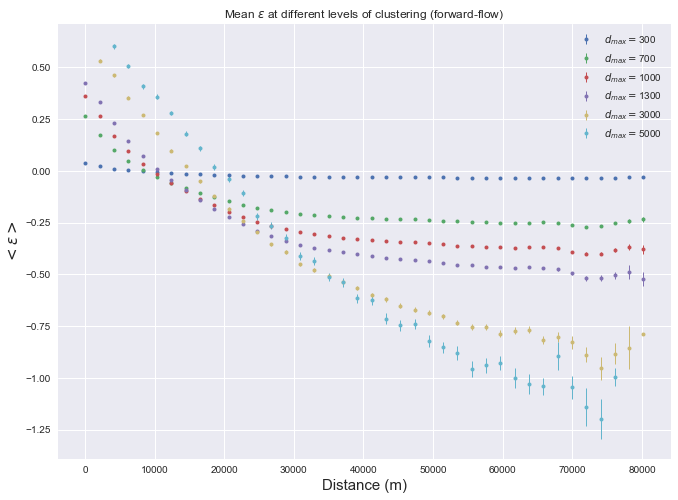

In [35]:
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

Seems smooth until we start clustering at the crazy length scales: $3000$ and $5000$. These are probably unrealistic anyway, when edge effects start appearing. Let's see.

In [37]:
for level in h2.levels:
    print(level.clusters_num)

5184
1850
1063
708
191
82


The last two are for $d_{max}=[3000,5000]$, it's a very small number of clusters so I can imagine that there'd be issues here.

## Including radiation model

This could be interesting.

In [27]:
d_maxs = [300, 700, 1000, 1300]
df = lon_df
N = 20 # number of bins

In [28]:
h2 = pop_hier(df, d_maxs)

In [ ]:
epsList, DMList = eps_hier(h2, model='g')

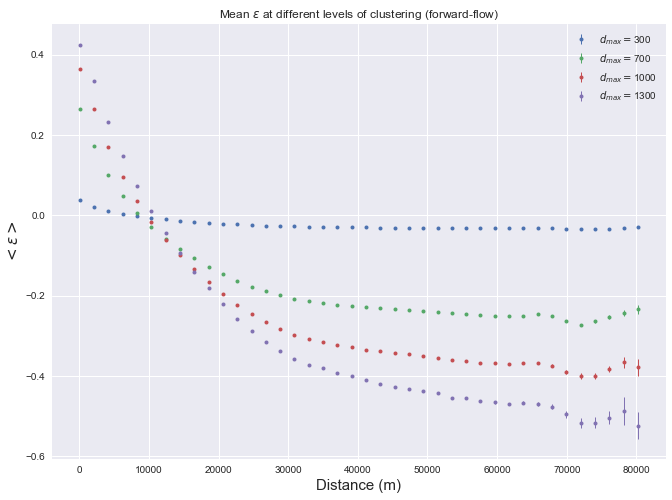

In [30]:
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

and now for radiation model

In [31]:
epsList_r, DMList_r = eps_hier(h2, model='r')

HBox(children=(IntProgress(value=0, max=4), HTML(value='')))

HBox(children=(IntProgress(value=0, max=6061), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5184), HTML(value='')))

/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: divide by zero encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2
/Users/JBremner/Documents/Docs/Imperial/Msci Project/Code/human_mob/hm/coarse_grain/coarse_matrix.py:49: RuntimeWarning: invalid value encountered in true_divide
  eps = (ODM2 - ODM1)/ODM2


HBox(children=(IntProgress(value=0, max=1850), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1063), HTML(value='')))

HBox(children=(IntProgress(value=0, max=708), HTML(value='')))

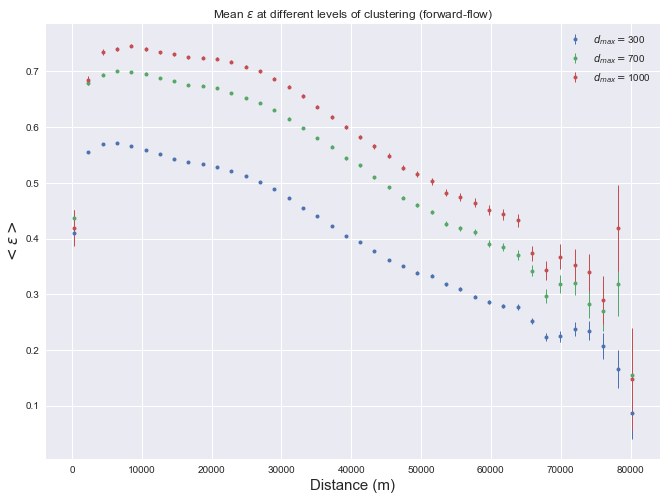

In [32]:
eps_distance_hier(epsList_r, DMList_r, d_maxs, 40)
plt.show()

## Investigating the negative $\epsilon$

We don't understand why $\epsilon$ goes negative, it doesn't make sense. Going to try on simpler data

In [6]:
from hm.analysis.scaling.pop_hierarchy import pop_hier
from hm.pop_models.pop_random import random as pop_random
from hm.analysis.scaling.plots import *
from hm.utils.utils import gamma_est

In [3]:
p = pop_random(2000)
unitArea = 1/2000 # just use average unit area over 1x1 square
p.locArea = np.ones(len(p.locCoords))*unitArea

In [4]:
d_maxs = [0.001, 0.01, 0.02, 0.03, 0.04] # these are on the typical length scale
h = pop_hier(p, d_maxs)

First try with the $\gamma$ exponent scaling with the cluster areas (as it should)

In [ ]:
epsList, DMList = eps_hier(h, model='g')

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


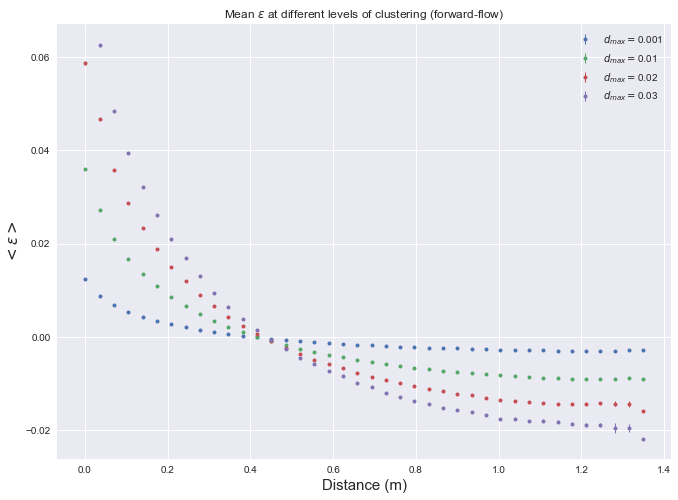

In [9]:
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

This looks like our plots, good. Suggests that the location and mass distributions don't really effect the errors substantially.

Now let's try with fixed $\gamma$ using gamma_est() at the base level.

In [10]:
gamma = gamma_est(unitArea)

In [ ]:
epsList, DMList = eps_hier(h, model='g', gamma=gamma)

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


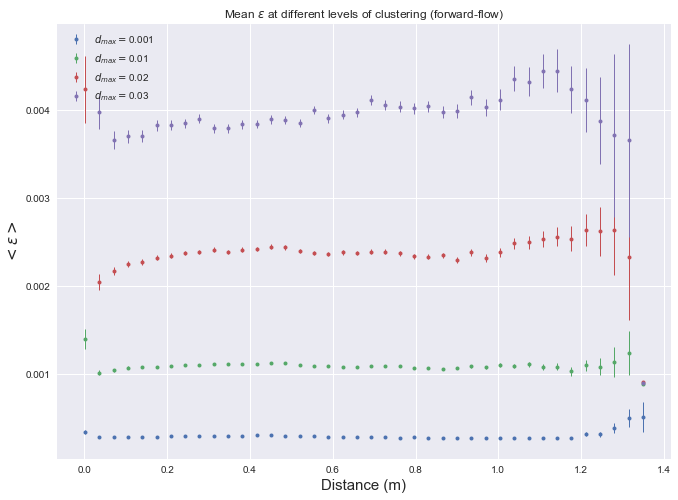

In [12]:
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

This doesn't go negative, as we expect! So the discrepancy comes in the scaling of the $\gamma$ exponent. This makes sense, as higher areas produce higher $\gamma$, therefore the flows will be reduced for further distances at larger clustering scales.

Perhaps we could create a formula for $\gamma$ that minimises $\epsilon$ with scaling? Wouldn't work at all distance separations though, obviously.

## Radiation plots for random distribution

In [ ]:
epsList, DMList = eps_hier(h, model='r')

/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/JBremner/Envs/msci/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


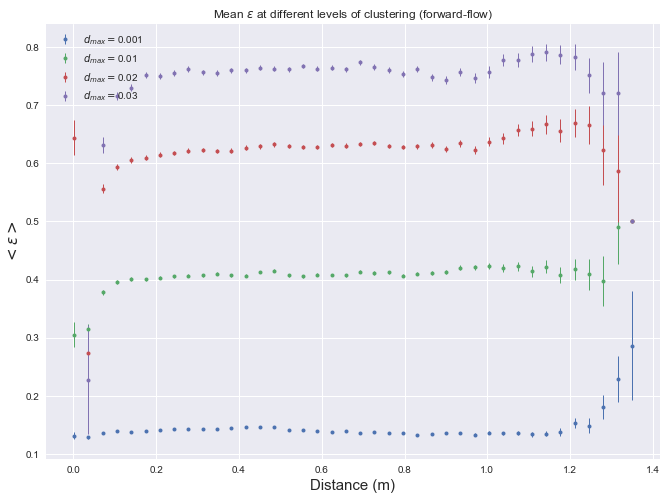

In [14]:
eps_distance_hier(epsList, DMList, d_maxs, 40)
plt.show()

Hmm this looks a lot like the gravity one, maybe run again.